<a href="https://colab.research.google.com/github/tehillamo/GitPlayground4/blob/main/Bert_TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DistilBertForSequenceClassification, DistilBertTokenizer
import io
from google.colab import files
import pandas as pd
import numpy as numpy

# Defining the Classifier/Pipeline
--> fine-tune the BERT model
---


Set the pipeline to classify text

In [ ]:
classifier_zero_shot = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


# Experiment 2 - Uploading & saving Data files

Upload the **open question** dataset



In [ ]:
uploaded = files.upload()

Saving Exp2_df_open_ques.csv to Exp2_df_open_ques.csv


In [ ]:
df_exp_2 = pd.read_csv(io.BytesIO(uploaded['Exp2_df_open_ques.csv']))
#df_exp_2

Upload the **models estimates** dataset


In [ ]:
uploaded = files.upload()

Saving Exp2_indiv_weight_dist_maxlike_10.csv to Exp2_indiv_weight_dist_maxlike_10.csv


In [ ]:
Exp2_df_weight_resist = pd.read_csv(io.BytesIO(uploaded['Exp2_indiv_weight_dist_maxlike_10.csv']))

Upload the **behaviour** dataset (for the proportion of risk taking for every individual)


In [ ]:
uploaded = files.upload()

Saving Exp2_data_behaviour.csv to Exp2_data_behaviour.csv


In [ ]:
Exp2_df_behaviour = pd.read_csv(io.BytesIO(uploaded['Exp2_data_behaviour.csv']))

Saving the open questions for:


1.   Saving the open question for **Q1** (about the **solo** condition)
2.   Saving the open question for **Q2** (about the **social** condition)


In [ ]:
Exp2_df_q2 = df_exp_2['Q2']
Exp2_df_q1 = df_exp_2['Q1']

# Identification of ***Super Describers***

> **Question 1 - Solo Condition.**

Looking at the responses in the solo condition. Here we are trying to classify who are the participants that have a good ability to describe their strategy that will allow us to map onto their behvaiour.



1.   Creating an empty dictionary to store all model predictions.

> 1.1. sequences = the free text participants provided for Q1.

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).

In [ ]:
Exp2_Q1_class_out_zero_shot = dict()
for i in range(40):
  Exp2_Q1_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp2_df_q1[i],
    candidate_labels = ["chose jar A", "chose jar B",
                        "stick to jar A", "stick to jar B", "riskier higher reward",
                        #"more white balls", " more black balls",
                        "higher value", "get 14","higher chance to get reward", "greater bonus", "get 6",
                        "higher chance to get black ball", "higher chance to get white ball",
                        "jar with the most black", "higher odds of success",
                        "stick", "go for £14 bonus",
                        "how many black and white balls",
                        "correct", "gut feeling", "intuition", #no strategy
                        ],
    #candidate_labels = ["use", "did not use"],
    multi_label = True)



2. Storing the output from BERT classifier


> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label
> 2.3. ids = participants' ID








In [ ]:
lables = []
scores = []
ids = []
sentences = []
for i in range(40):
    id = df_exp_2['id'][i]
    lable = Exp2_Q1_class_out_zero_shot[i]['labels'][0]
    score = Exp2_Q1_class_out_zero_shot[i]['scores'][0]
    sentence = Exp2_Q1_class_out_zero_shot[i]['sequence']
    ids.append(id)
    lables.append(lable)
    scores.append(score)
    sentences.append(sentence)

# converting lists to arrays
scores = np.array(scores)
sentences = np.array(sentences)
lables = np.array(lables)
# creating a dataset consisting of 1) IDs, 2) free text, 3) best labels 4)their scores
Exp2_Q1_scores_and_lables = numpy.column_stack([df_exp_2['id'], sentences, lables, scores])
Exp2_Q1_scores_and_lables =  pd.DataFrame(Exp2_Q1_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp2_Q1_scores_and_lables['id'] = Exp2_Q1_scores_and_lables['id'].astype(float)
Exp2_Q1_scores_and_lables['Score'] = Exp2_Q1_scores_and_lables['Score'].astype(float)

# adding the original behavioural data to the output from the model
Exp2_df_behaviour['id'] = Exp2_df_behaviour['id'].astype(float)

ind = np.array(Exp2_Q1_scores_and_lables.index)
ind = np.array(ind)[0:]
ind
Exp2_df_behaviour_sub = Exp2_df_behaviour.loc[ind]

Exp2_q1_all = numpy.column_stack([Exp2_df_behaviour_sub['id'],
                                  Exp2_df_behaviour_sub['meanSolo'],
                                  Exp2_Q1_scores_and_lables['id'],
                                  Exp2_Q1_scores_and_lables['sentence'],
                                  Exp2_Q1_scores_and_lables['Score'],
                                  Exp2_Q1_scores_and_lables['Lable']])

Exp2_q1_all = pd.DataFrame(Exp2_q1_all, columns = ['id_behaviour','meanRiskSolo', 'id_text', 'sentence', 'Score', 'Label'])


In [ ]:
from google.colab import files
#Exp2_q1_all.to_csv('Exp2_q1_all.csv', index=False)
Exp2_q1_all['Score'] = Exp2_q1_all['Score'].astype(float)

scores_exp2 = round(Exp2_q1_all['Score'],4)

scores_exp2.to_csv('Exp2_q1_allScores.csv', index=False)


RiskPref = Exp2_q1_all['meanRiskSolo']

RiskPref.to_csv('Exp2_q1_RiskPref.csv', index=False)


In [ ]:
#Exp2_Q1_class_out_zero_shot

In [ ]:
# subj_judg = ["none", "most black:risk averse", "num of black balls:none", "num of black balls:none",
#              "correct:none", "higher odds of success:risk averse", "confidence:none", "chance of white balls:risk seeking",
#              "according to grid:none", "stick to B:risk averse", "choose to B:risk averse", "just stick:none", "better chance of rewards:risk averse",
#              "went for 14: risk seeking", "go with higher value:risk seeking", "which jar it came from:none", "random, gut feeling:none",
#              "num of black balls:none", "guess which jar:none", "how many white balls:risk seeking?", "secure the biggest bonus:risk seeking",
#              "best chance of black ball:risk averse", "I always tried to draw a ball from urn 1:risk seeking", "intuition:none", "sticking even on Jar A because the potential prize was bigger:risk seeking",
#             "choose from Jar B:risk averse","get the 14 ball:risk seeking", "always wanted 14: risk seeking", "weighted each colour:none", "gut feeling", "number of each colour:none",
#              "greater chance of obtaining a reward, 6: risk averse", "number of each colour:none", "none", "based on amount in each jar:none", "weighted each colour:none",
#              "compare how many black:none", "looking at the picks:none", "based on greater chance of the black ball coming from pot B:risk averse", "whichever had the best odds"]
# Exp2_Q1_scores_and_lables['subj_text_analysis'] = subj_judg

#Exp2_Q1_scores_and_lables = Exp2_Q1_scores_and_lables[Exp2_Q1_scores_and_lables['Score']>.7]


In [ ]:
#Exp2_q1_all = Exp2_q1_all[(Exp2_q1_all['id_text'] != 13987.0 ) & (Exp2_q1_all['id_text'] != 49865.0) & (Exp2_q1_all['id_text'] != 50625.0) & (Exp2_q1_all['id_text'] != 57379.0) & (Exp2_q1_all['id_text'] != 57478.0) & (Exp2_q1_all['id_text'] != 70064.0) & (Exp2_q1_all['id_text'] != 83549.0) & (Exp2_q1_all['id_text'] != 89063.0) & (Exp2_q1_all['id_text'] != 93818.0) & (Exp2_q1_all['id_text'] != 98074.0)]

3.*Exclusion*

In [ ]:
# initial sample size = 40
len(Exp2_q1_all['Score'])

40

> 3.1. **Step 1** - exclusion of strategies that cannot be identified as meaningful (that can explain any behvaiour comparable to the model. For example, 'corretc' or 'by how many black and white balls' )






In [ ]:
from pandas.tseries.frequencies import unique
Exp2_q1_all = Exp2_q1_all[Exp2_q1_all['Label'] != "correct"] # resulted in exclusion of 4 indivisuals
Exp2_q1_all = Exp2_q1_all[Exp2_q1_all['Label'] !=  "how many black and white balls"] # resulted in exclusion of 5 indivisuals


In [ ]:
# Step 1 -> sample size = 31
len(Exp2_q1_all['Score'])

31

In [ ]:
#unique labels
unique(Exp2_q1_all['Label'])

array(['jar with the most black', 'higher chance to get reward',
       'higher chance to get white ball', 'stick to jar B',
       'higher chance to get black ball', 'greater bonus', 'higher value',
       'intuition', 'gut feeling', 'riskier higher reward',
       'go for £14 bonus', 'stick', 'get 6', 'higher odds of success'],
      dtype=object)

Assign **risk preferences** to the different lables. For example: 'jar with the most black' meant that the individual was aiming to chose from the jar with most black balls (i.e., the safer jar) and hence will be classified as risk averse.

In [ ]:
ind = np.array(Exp2_q1_all.index)
ind = np.array(ind)[0:]

classes_risk_from_text = list()

for i in ind:
  if(Exp2_q1_all['Label'][i] == 'jar with the most black' or Exp2_q1_all['Label'][i] == 'stick to jar B' or Exp2_q1_all['Label'][i] == 'higher chance to get black ball' or Exp2_q1_all['Label'][i] == 'higher odds of success' or Exp2_q1_all['Label'][i] == "get 6" or Exp2_q1_all['Label'][i] == "chose jar B"):
      classes_risk_from_text.append("risk averse")
      Exp2_q1_all['Score'][i] = 1- Exp2_q1_all['Score'][i]
  if (Exp2_q1_all['Label'][i] == 'riskier higher reward' or Exp2_q1_all['Label'][i] == 'greater bonus' or Exp2_q1_all['Label'][i] == 'higher chance to get reward' or Exp2_q1_all['Label'][i] == 'higher chance to get white ball' or Exp2_q1_all['Label'][i] == 'higher value' or Exp2_q1_all['Label'][i] == 'get 14' or Exp2_q1_all['Label'][i] == "go for £14 bonus"):
      classes_risk_from_text.append("risk seeking")
  if (Exp2_q1_all['Label'][i] == "gut feeling" or Exp2_q1_all['Label'][i] == "intuition" or Exp2_q1_all['Label'][i] == "stick"):
      classes_risk_from_text.append("none")

#creating a new column that includes the new classification
Exp2_q1_all['newcol'] = classes_risk_from_text

<ipython-input-24-c8496c28a671>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp2_q1_all['Score'][i] = 1- Exp2_q1_all['Score'][i]


> 3.2. **Step 2** -
Inclusion of individuals according to their quality in description.

- If individuals that were classified with a lable that describes a 'risk averse' and indeed took risk less than .5 are included
- If individuals that were classified with a lable that describes a 'risk seeking' and indeed took risk more than .5 are included
-  If individuals that were classified with a lable that describes a 'none' and indeed took risk around .5 are included.

In [ ]:
from google.colab import files
#Exp2_q1_all.to_csv('Exp2_q1_all.csv', index=False)

Exp2_q1_all.to_csv('Exp2_q1_riskPref.csv', index=False)

In [ ]:
Exp2_q1_all_sub = Exp2_q1_all[(Exp2_q1_all['newcol'] == "risk averse") & (Exp2_q1_all['meanRiskSolo'] < .5) | (Exp2_q1_all['newcol'] == "risk seeking") & (Exp2_q1_all['meanRiskSolo'] > .5) | (Exp2_q1_all['newcol'] == "none") & ((Exp2_q1_all['meanRiskSolo'] <= .55) & (Exp2_q1_all['meanRiskSolo'] > .45))]


In [ ]:
Exp2_q1_all_sub


,id_behaviour,meanRiskSolo,id_text,sentence,Score,Label,newcol
1,2266.0,0.08,2266.0,looked at how many blacks there were in grid a...,0.075340,jar with the most black,risk averse
5,24959.0,0.68,24959.0,i played it safe to begin with choosing the ou...,0.981859,higher chance to get reward,risk seeking
9,34664.0,0.0,34664.0,i tried to stick if i thought it was jar b,0.030028,stick to jar B,risk averse
10,35085.0,0.454545,35085.0,tended to choose jar b for the higher percenta...,0.001454,higher chance to get black ball,risk averse
11,41748.0,0.6,41748.0,i usually decided to stick with my initial cho...,0.666616,greater bonus,risk seeking
13,44108.0,0.727273,44108.0,generally tried to go for £14 bonus,0.949701,higher chance to get reward,risk seeking
14,44140.0,0.654545,44140.0,i tried to go with the higher value,0.990022,higher value,risk seeking
18,57110.0,0.828571,57110.0,tried to see which jar it might have come from...,0.595992,riskier higher reward,risk seeking
21,57796.0,0.0,57796.0,assessment of what's come out of the jar and w...,0.038962,higher chance to get black ball,risk averse
22,61225.0,0.828571,61225.0,"determined which urn by higher % of colour, e....",0.883230,higher chance to get white ball,risk seeking


In [ ]:
# Step 2 -> sample size = 19 ('super' descibers)
len(Exp2_q1_all_sub['Label'])

19

In [ ]:
# the row names for the included individuals
Exp2_q1_all_sub.index # 1, 5, 9, 10, 11, 13, 14, 18, 21, 22, 23, 25, 26, 27, 29, 35, 36, 38, 39

Int64Index([1, 5, 9, 10, 11, 13, 14, 18, 21, 22, 23, 25, 26, 27, 29, 35, 36,
            38, 39],
           dtype='int64')

# Experiment 3 - Uploading & saving Data files


Upload the **open question** dataset

In [ ]:
uploaded = files.upload()

Saving Exp3_df_open_ques.csv to Exp3_df_open_ques.csv


In [ ]:
df_exp_3 = pd.read_csv(io.BytesIO(uploaded['Exp3_df_open_ques.csv']))


Upload the **model estimates** dataset


In [ ]:
uploaded = files.upload()

Saving Exp3_Indiv_Model_compare.csv to Exp3_Indiv_Model_compare.csv


In [ ]:
Exp3_df_weight_resist = pd.read_csv(io.BytesIO(uploaded['Exp3_Indiv_Model_compare.csv']))

Upload the **behaviour** dataset


In [ ]:
uploaded = files.upload()

Saving Exp3_data_behaviour.csv to Exp3_data_behaviour.csv


In [ ]:
Exp3_df_behaviour = pd.read_csv(io.BytesIO(uploaded['Exp3_data_behaviour.csv']))

Saving the open questions for:


1.   Saving the open question for **Q1** (about the **solo** condition)
2.   Saving the open question for **Q2** (about the **social** condition)

In [ ]:
Exp3_df_q2 = df_exp_3['Q2']
Exp3_df_q1 = df_exp_3['Q1']

# **Question 1**
**Solo Condition.**

`Looking at the responses in the solo condition. Here we are trying to classify who are the participants that have a good ability to describe their strategy that will allow us to map onto their behvaiour. `

Creating an empty dictionary to store all model predictions.
> 1.1. sequences = the free text participants provided for Q1.

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).

changesss


In [ ]:
Exp3_Q1_class_out_zero_shot = dict()
for i in range(41):
  Exp3_Q1_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp3_df_q1[i],
    candidate_labels = ["chose jar A", "chose from jar a", "odds of white", "likelihood to get white ball",
                        "chose jar B", "chose from jar b", "jar with the most black","odds of black", "likelihood to get black ball",
                        "stick to jar A", "stick to jar B",
                        "riskier higher reward",
                         "higher value", "get 14","higher chance to get reward", "greater bonus", "higher chance to get white ball",
                        "get 6","go for £14 bonus",
                        "higher chance to get black ball",
                         "higher odds of success",
                        "chose to stick", "chose to switch",
                        "how many black and white balls",
                        "correct", "gut feeling", "intuition", #no strategy
                        ],
    multi_label = True)

2. Storing the output from BERT classifier

> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label

> 2.3. ids = participants' ID


In [ ]:
lables = []
scores = []
ids = []
sentences = []
for i in range(41):
    id = df_exp_3['id'][i]
    lable = Exp3_Q1_class_out_zero_shot[i]['labels'][0]
    score = Exp3_Q1_class_out_zero_shot[i]['scores'][0]
    sentence = Exp3_Q1_class_out_zero_shot[i]['sequence']
    ids.append(id)
    lables.append(lable)
    scores.append(score)
    sentences.append(sentence)

# converting lists to arrays
scores = np.array(scores)
sentences = np.array(sentences)
lables = np.array(lables)

# creating a dataset consisting of 1) IDs, 2) free text, 3) best labels 4)their scores
Exp3_Q1_scores_and_lables = numpy.column_stack([df_exp_3['id'], sentences, lables, scores])
Exp3_Q1_scores_and_lables =  pd.DataFrame(Exp3_Q1_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp3_Q1_scores_and_lables['id'] = Exp3_Q1_scores_and_lables['id'].astype(float)
Exp3_Q1_scores_and_lables['Score'] = Exp3_Q1_scores_and_lables['Score'].astype(float)


# adding the original behavioural data to the output from the model
Exp3_df_behaviour['id'] = Exp3_df_behaviour['id'].astype(float)

# combine all information into one dataframe
Exp3_q1_all = numpy.column_stack([Exp3_df_behaviour['id'],
                                  Exp3_df_behaviour['meanSolo'],
                                  Exp3_Q1_scores_and_lables['id'],
                                  Exp3_Q1_scores_and_lables['sentence'],
                                  Exp3_Q1_scores_and_lables['Score'],
                                  Exp3_Q1_scores_and_lables['Lable']])

Exp3_q1_all = pd.DataFrame(Exp3_q1_all, columns = ['id_behaviour','meanRiskSolo', 'id_text', 'sentence', 'Score', 'Label'])

In [ ]:
# initial sample size: N = 41
len(Exp3_q1_all['Label'])

41

In [ ]:
Exp3_q1_all

,id_behaviour,meanRiskSolo,id_text,sentence,Score,Label
0,380.0,0.2,380.0,I made decisions based on the likelihood of ge...,0.979793,get 6
1,2360.0,0.091,2360.0,I thought about probabilities THROUGHOUT,0.444884,higher odds of success
2,4766.0,0.0,4766.0,I tried to make sure the final pick came from ...,0.99266,stick to jar B
3,5017.0,0.4,5017.0,I tried to choose from jar b the whole time. ...,0.893663,higher odds of success
4,12674.0,0.8,12674.0,Mostly chose to stick,0.969021,chose to stick
5,19278.0,0.786,19278.0,I tried to choose the 14£ reward,0.983969,go for £14 bonus
6,20287.0,0.2,20287.0,Based on what the jar with the highest number ...,0.98457,jar with the most black
7,21006.0,0.283,21006.0,I guessed the ones with more black were from j...,0.958534,chose jar B
8,22067.0,0.455,22067.0,I just tried to figure the odds if it was blac...,0.96209,odds of black
9,24921.0,0.836,24921.0,I went for the risk and high reward Jar A,0.997029,higher odds of success


In [ ]:
from google.colab import files
#Exp2_q1_all.to_csv('Exp2_q1_all.csv', index=False)
Exp3_q1_all['Score'] = Exp3_q1_all['Score'].astype(float)

scores_exp3 = round(Exp3_q1_all['Score'],4)

scores_exp3.to_csv('Exp3_q1_allScores.csv', index=False)


RiskPref = Exp3_q1_all['meanRiskSolo']

RiskPref.to_csv('Exp3_q1_RiskPref.csv', index=False)

Exp3_q1_all['Score'].to_csv('Exp3_q1_allScores.csv', index=False)

Exp3_q1_all.to_csv('Exp3_q1_all.csv', index=False)


3.  Exclusion



> 3.1. **Step 1** - exclusion of strategies that cannot be identified as meaningful (that can explain any behvaiour comparable to the model. For example, 'corretc' or 'by how many black and white balls' )

In [ ]:
from pandas.tseries.frequencies import unique
Exp3_q1_all = Exp3_q1_all[Exp3_q1_all['Label'] != "correct"] # 4 individuals were excluded
Exp3_q1_all = Exp3_q1_all[Exp3_q1_all['Label'] !=  "how many black and white balls"] # 1 individuals were excluded

In [ ]:
# Step 1 -> N = 36
len(Exp3_q1_all['Label'])

36

In [ ]:
# Looking at the unique lables left
unique(Exp3_q1_all['Label'])

array(['get 6', 'higher odds of success', 'stick to jar B',
       'chose to stick', 'go for £14 bonus', 'jar with the most black',
       'chose jar B', 'odds of black', 'likelihood to get black ball',
       'higher chance to get black ball', 'gut feeling',
       'likelihood to get white ball', 'chose to switch', 'higher value',
       'higher chance to get reward', 'chose from jar b',
       'riskier higher reward'], dtype=object)

In [ ]:
Exp3_q1_all.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37,
            38, 40],
           dtype='int64')

Assign **risk preferences** to the different lables. For example: 'jar with the most black' meant that the individual was aiming to chose from the jar with most black balls (i.e., the safer jar) and hence will be classified as risk averse.

In [ ]:
exp3_classes_risk_from_text = list()

for i in Exp3_q1_all.index:
  print(i)
  if(Exp3_q1_all['Label'][i] == 'chose from jar b' or Exp3_q1_all['Label'][i] == 'chose jar B' or Exp3_q1_all['Label'][i] == 'odds of black' or Exp3_q1_all['Label'][i] == 'jar with the most black' or Exp3_q1_all['Label'][i] == 'stick to jar B' or Exp3_q1_all['Label'][i] == 'higher chance to get black ball' or Exp3_q1_all['Label'][i] == 'higher odds of success' or Exp3_q1_all['Label'][i] == 'get 6' or Exp3_q1_all['Label'][i] == 'likelihood to get black ball'):
      exp3_classes_risk_from_text.append("risk averse")
      Exp3_q1_all['Score'][i] = 1- Exp3_q1_all['Score'][i]
  if (Exp3_q1_all['Label'][i] == 'riskier higher reward' or Exp3_q1_all['Label'][i] == 'greater bonus' or Exp3_q1_all['Label'][i] == 'higher chance to get reward' or Exp3_q1_all['Label'][i] == 'higher chance to get white ball' or Exp3_q1_all['Label'][i] == 'higher value' or Exp3_q1_all['Label'][i] == 'get 14' or Exp3_q1_all['Label'][i] == "go for £14 bonus" or Exp3_q1_all['Label'][i] == "likelihood to get white ball"):
      exp3_classes_risk_from_text.append("risk seeking")
  if (Exp3_q1_all['Label'][i] == 'gut feeling' or Exp3_q1_all['Label'][i] == 'chose to switch' or Exp3_q1_all['Label'][i] == 'chose to stick'):
      exp3_classes_risk_from_text.append("none")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
18
19
20
21
22
23
24
25
26
27
28
29
30
32
33
35
36
37
38
40


<ipython-input-53-43b5bb2efbc3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp3_q1_all['Score'][i] = 1- Exp3_q1_all['Score'][i]


In [ ]:
Exp3_q1_all['newcol'] = exp3_classes_risk_from_text

> 3.2. **Step 2** -
Inclusion of individuals according to their quality in description.

- If individuals that were classified with a lable that describes a 'risk averse' and indeed took risk less than .5 are included
- If individuals that were classified with a lable that describes a 'risk seeking' and indeed took risk more than .5 are included
-  If individuals that were classified with a lable that describes a 'none' and indeed took risk around .5 are included.

In [ ]:
Exp3_q1_all_sub = Exp3_q1_all[(Exp3_q1_all['newcol'] == "risk averse") & (Exp3_q1_all['meanRiskSolo'] < .5) | (Exp3_q1_all['newcol'] == "risk seeking") & (Exp3_q1_all['meanRiskSolo'] > .5) |(Exp3_q1_all['newcol'] == "none") & ((Exp3_q1_all['meanRiskSolo'] <= .55) & (Exp3_q1_all['meanRiskSolo'] > .45))]


In [ ]:
# step 2 -> N = 20
len(Exp3_q1_all_sub['Label'])

20

In [ ]:
Exp3_q1_all_sub.index # 0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15, 18, 23, 25, 27, 29, 35,38

Int64Index([0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15, 18, 23, 25, 27, 29, 35,
            38],
           dtype='int64')

In [ ]:
# Exp2_q1_all_sub = Exp2_q1_all_sub[['id_behaviour', 'meanRiskSolo', 'id_text', 'sentence', 'Score', 'Label']]
# Exp2_q1_all_sub.head(n=15)


# The Relationship between Social Strategy Description & Model Estimates

(only for ***Super Describers*** from Q1)

# **QUESTION - 2**

## **Experiment 2**

1. Looking at the responses in the social condition. Here we are trying to classify who are the participants that had a good ability to describe their strategy in Q1 (solo condition) that will allow us to map their strategy descriptions and their individual model estimates.

Creating an empty dictionary to store all model predictions.
> 1.1. sequences = the free text participants provided for Q1.

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).



In [ ]:
Exp2_class_out_zero_shot = dict()

for i in range(40):
  Exp2_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp2_df_q2[i],
    candidate_labels = ["influenced by", "did not influence me", "sometimes influenced me", "often influenced me",
                        "used the others", "did not use the others", "sometimes used the others", "often used the others",
                        "care about majority", "did not care about the majority", "sometimes cared about majority", "often cared about majority",
                        "care about others", "did not care about others", "sometimes cares about others", "often cares about others"],
    #candidate_labels = ["use", "did not use"],
    multi_label = True)


In [ ]:
Exp2_df_weight = Exp2_df_weight_resist[['Weight_Dist', 'id']]
Exp2_df_weight

,Weight_Dist,id
0,0.000000,792
1,0.762764,2266
2,0.000000,7728
3,0.036514,13987
4,0.484039,18294
5,0.000000,24959
6,0.613332,26336
7,0.000000,32779
8,0.759952,32801
9,0.000000,34664


In [ ]:
Exp2_df_resist = Exp2_df_weight_resist[['social_info_resistance', 'id']]
Exp2_df_resist


,social_info_resistance,id
0,10.000000,792
1,10.000000,2266
2,10.000000,7728
3,10.000000,13987
4,0.049395,18294
5,2.143704,24959
6,0.474766,26336
7,10.000000,32779
8,0.036086,32801
9,10.000000,34664


In [ ]:
#Exp2_class_out_zero_shot

2. Storing the output from BERT classifier

> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label
> 2.3. ids = participants' ID

In [ ]:
Exp2_lables = []
Exp2_scores = []
Exp2_ids = []
Exp2_sentences = []
for i in range(40):
    id = df_exp_2['id'][i]
    lable = Exp2_class_out_zero_shot[i]['labels'][0]
    score = Exp2_class_out_zero_shot[i]['scores'][0]
    sentence = Exp2_class_out_zero_shot[i]['sequence']
    #print(ids, lables, scores)
    Exp2_ids.append(id)
    Exp2_lables.append(lable)
    Exp2_scores.append(score)
    Exp2_sentences.append(sentence)
Exp2_scores = np.array(Exp2_scores)
Exp2_sentences = np.array(Exp2_sentences)
Exp2_ids = np.array(Exp2_ids)

import numpy as numpy

Exp2_scores_and_lables = numpy.column_stack([Exp2_ids, Exp2_sentences, Exp2_lables, Exp2_scores])
Exp2_scores_and_lables =  pd.DataFrame(Exp2_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp2_scores_and_lables['id'] = Exp2_scores_and_lables['id'].astype(float)
Exp2_df_behaviour['dist_risk'] = Exp2_df_behaviour['dist_risk'].astype(float)

Exp2_scores_and_lables = numpy.column_stack([Exp2_scores_and_lables['id'], Exp2_sentences,
                                             Exp2_lables, Exp2_scores,
                                             Exp2_df_weight_resist['Weight_Dist'],
                                             Exp2_df_weight_resist['social_info_resistance'],
                                             #Exp2_df_weight_resist['id'],
                                             Exp2_df_behaviour['dist_risk']])

Exp2_scores_and_lables = pd.DataFrame(Exp2_scores_and_lables, columns = ['id_score', 'sentences',
                                                                         'Lable', 'Score',
                                                                         'weightDist', 'ResistBayes',
                                                                         'behaviour_dist'])


In [ ]:
# Convert the neccesary columns
#Exp2_scores_and_lables = Exp2_scores_and_lables.sort_values(by=['id'])
Exp2_scores_and_lables['behaviour_dist'] = Exp2_scores_and_lables['behaviour_dist'].astype(float)
Exp2_scores_and_lables['behaviour_dist'] = abs(Exp2_scores_and_lables['behaviour_dist'])
#scores_and_lables['Lable']
Exp2_scores_and_lables['Score'] = Exp2_scores_and_lables['Score'].astype(float)
Exp2_scores_and_lables['weightDist'] = Exp2_scores_and_lables['weightDist'].astype(float)
Exp2_scores_and_lables['ResistBayes'] = Exp2_scores_and_lables['ResistBayes'].astype(float)
Exp2_scores_and_lables['behaviour_dist'] = Exp2_scores_and_lables['behaviour_dist'].astype(float)
Exp2_scores_and_lables['behaviour_dist']  = abs(Exp2_scores_and_lables['behaviour_dist'])


In [ ]:
unique(Exp2_scores_and_lables['Lable'])

array(['sometimes influenced me', 'did not influence me', 'influenced by',
       'did not care about the majority', 'often cared about majority',
       'sometimes used the others', 'did not care about others',
       'did not use the others'], dtype=object)

In [ ]:
from google.colab import files
#Exp2_q1_all.to_csv('Exp2_q1_all.csv', index=False)

Exp2_scores_and_lables.to_csv('Exp2_scores_and_lables.csv', index=False)

3. Conversion of the labels scores into ranked-ordered scores.


> - If the individuals' best lable indicated that they beleived to have **not paid attention to otehrs' choices**, we wanted to convert it into a **low weight**. We, therefore substracted the high label from 1 (i.e., the maximum level of accuracy. most of the accuracy labels are around .9)

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices**, we left the accuracy as **high** as its models accuracy score.

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices sometimes**, we wanted to convert it into a **mid weight**. We, therefore substracted .5 from their label accuracy as "sometimes" is about half of the time.

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices often**, we wanted to convert it into a **relatively high weight**. We, therefore substracted .2 from their label accuracy as "often" is about .8 of the time.


In [ ]:
#for i in ind:
for i in range(40):
  if Exp2_scores_and_lables['Lable'][i] == 'did not care about others' or Exp2_scores_and_lables['Lable'][i] == 'did not care about the majority' or Exp2_scores_and_lables['Lable'][i] == 'did not influence me' or Exp2_scores_and_lables['Lable'][i] == 'did not use the others':
     Exp2_scores_and_lables['Score'][i] = 1 - Exp2_scores_and_lables['Score'][i]
  if Exp2_scores_and_lables['Lable'][i] == Exp2_scores_and_lables['Lable'][i] == 'sometimes influenced me' or Exp2_scores_and_lables['Lable'][i] == 'sometimes used the others':
      Exp2_scores_and_lables['Score'][i] = Exp2_scores_and_lables['Score'][i] - .5
  if Exp2_scores_and_lables['Lable'][i] == 'often cared about majority':
    Exp2_scores_and_lables['Score'][i] = Exp2_scores_and_lables['Score'][i] - .2


<ipython-input-65-7427b4fb5acb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp2_scores_and_lables['Score'][i] = Exp2_scores_and_lables['Score'][i] - .5
<ipython-input-65-7427b4fb5acb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp2_scores_and_lables['Score'][i] = 1 - Exp2_scores_and_lables['Score'][i]
<ipython-input-65-7427b4fb5acb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp2_scores_and_lables['Score'][i] = Exp2_s

In [ ]:
#Desc_Beha = Exp2_scores_and_lables['Score'] - Exp2_scores_and_lables['behaviour_dist']
# Exp2_Data_full = numpy.column_stack([Exp2_scores_and_lables, Exp2_sentences])
# Exp2_Data_full = pd.DataFrame(Exp2_Data_full, columns = ['Score','Lable',
#                                                'id_score',
#                                                'weightDist',
#                                                'ResistBayes',
#                                                'id_modeling',
#                                                #'behaviour_dist',
#                                                'diff_descr_behaviour',
#                                                'strategy_desc'])

Choosing **only the 'super describers'** from the Solo Condition



In [ ]:
Exp2_scores_and_lables_full = Exp2_scores_and_lables
Exp2_Q1_super_describers = Exp2_q1_all_sub.index
Exp2_scores_and_lables = Exp2_scores_and_lables.loc[Exp2_Q1_super_describers]

In [ ]:
len(Exp2_scores_and_lables_full['Lable'])

40

In [ ]:
Exp2_scores_and_lables.head(n=10)

,id_score,sentences,Lable,Score,weightDist,ResistBayes,behaviour_dist
1,2266.0,i didn't find this information useful but did ...,did not influence me,0.001475,0.762764,10.000000,0.465833
5,24959.0,i checked the other people's answers about hal...,sometimes influenced me,0.498814,0.000000,2.143704,0.040238
9,34664.0,i kept my choices the same as the first experi...,sometimes influenced me,0.442008,0.000000,10.000000,0.000000
10,35085.0,sometimes followed the crowd opinion but mostl...,sometimes influenced me,0.497836,0.000000,10.000000,0.107359
11,41748.0,i typically took other perople's information i...,sometimes influenced me,0.499408,1.000000,0.000000,0.288889
13,44108.0,"mostly went for the £14 bonus, but did occasio...",sometimes influenced me,0.497213,0.163562,10.000000,0.154545
14,44140.0,i tried to go with the higher value,influenced by,0.991839,0.000000,10.000000,0.345455
18,57110.0,tried to guess waht jar it came from and then ...,sometimes influenced me,0.488801,1.000000,0.000000,0.288889
21,57796.0,used the same basic process as when choosing a...,sometimes used the others,0.464213,1.000000,0.000000,0.505263
22,61225.0,"exactly the same strategy, but i looked at the...",influenced by,0.973515,0.000000,3.536135,0.110658


Log transform the scores

In [ ]:
#np.log(Exp2_scores_and_lables['Score'])

## **Experiment 3**

1. Looking at the responses in the social condition. Here we are trying to classify who are the participants that had a good ability to describe their strategy in Q1 (solo condition) that will allow us to map their strategy descriptions and their individual model estimates.

Creating an empty dictionary to store all model predictions.
> 1.1. sequences = the free text participants provided for Q1.

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).



In [ ]:
Exp3_class_out_zero_shot = dict()

for i in range(41):
  Exp3_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp3_df_q2[i],
    candidate_labels = ["influenced by", "did not influence me", "sometimes influenced me", "often influenced me",
                        "used the others", "did not use the others", "sometimes used the others", "often used the others",
                        "care about majority", "did not care about the majority", "sometimes cared about majority", "often cared about majority",
                        "care about others", "did not care about others", "sometimes cares about others", "often cares about others"],
    #candidate_labels = ["use", "did not use"],
    multi_label = True)

In [ ]:
Exp3_df_weight = Exp3_df_weight_resist[['Weight_Dist', 'id']]
Exp3_df_weight

,Weight_Dist,id
0,0.088032,380
1,0.324466,2360
2,0.130080,4766
3,0.000000,5017
4,0.482574,12674
5,0.972106,19278
6,0.606707,20287
7,0.000000,21006
8,0.525840,22067
9,0.484552,24921


2. Storing the output from BERT classifier

> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label
> 2.3. ids = participants' ID

In [ ]:
Exp3_lables = []
Exp3_scores = []
Exp3_ids = []
Exp3_sentences = []
for i in range(41):
    id = df_exp_3['id'][i]
    lable = Exp3_class_out_zero_shot[i]['labels'][0]
    score = Exp3_class_out_zero_shot[i]['scores'][0]
    sentence = Exp3_class_out_zero_shot[i]['sequence']
    #print(ids, lables, scores)
    Exp3_ids.append(id)
    Exp3_lables.append(lable)
    Exp3_scores.append(score)
    Exp3_sentences.append(sentence)
Exp3_scores = np.array(Exp3_scores)
Exp3_sentences = np.array(Exp3_sentences)
Exp3_ids = np.array(Exp3_ids)

import numpy as numpy

Exp3_scores_and_lables = numpy.column_stack([Exp3_ids, Exp3_sentences, Exp3_lables, Exp3_scores])
Exp3_scores_and_lables =  pd.DataFrame(Exp3_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp3_scores_and_lables['id'] = Exp3_scores_and_lables['id'].astype(float)
Exp3_df_behaviour['dist_risk'] = Exp3_df_behaviour['dist_risk'].astype(float)

Exp3_scores_and_lables = numpy.column_stack([Exp3_scores, Exp3_lables, Exp3_sentences,
                                             Exp3_scores_and_lables['id'],
                                             Exp3_df_weight_resist['Weight_Dist'],
                                             Exp3_df_weight_resist['social_info_resistance'],
                                             Exp3_df_weight_resist['id'],
                                             Exp3_df_behaviour['dist_risk']])

Exp3_scores_and_lables = pd.DataFrame(Exp3_scores_and_lables, columns = ['Score',
                                                                         'Lable', 'sentences',
                                                                         'id_score',
                                                                         'weightDist',
                                                                         'ResistBayes',
                                                                         'id_modeling',
                                                                         'behaviour_dist'])

In [ ]:
Exp3_scores_and_lables['ResistBayes']

0     3.5157702264355035
1      5.864009436813625
2       9.99999970046681
3     3.3939353874568874
4       6.18025834089463
5      6.180339887498947
6     0.9029223798777418
7     1.3974921666669176
8      4.061577817337739
9      6.180354246102728
10     6.975741375430604
11      9.99999970046681
12     9.311164193870292
13      9.16098797882244
14    1.7294590032898125
15     6.180261858815622
16     6.180339887498947
17    0.4888188065932325
18     9.430049675503518
19     3.867598082912819
20     8.572075862648264
21     9.366175741663112
22    3.5157702264355035
23      9.16098797882244
24     8.521825875241849
25     9.217105532888452
26     6.184870926036796
27     5.874953338535993
28    1.0003225034342285
29     6.180339887498947
30     6.153877339158479
31     6.184870926036796
32      4.77980103798094
33     6.180261858815622
34      9.99999903069024
35      9.99999951534512
36    0.9519494249011576
37    0.6075185898368163
38    2.1458730968132005
39     6.180334775080112


In [ ]:
#Exp2_scores_and_lables = Exp2_scores_and_lables.sort_values(by=['id'])
Exp3_scores_and_lables['behaviour_dist'] = Exp3_scores_and_lables['behaviour_dist'].astype(float)
Exp3_scores_and_lables['behaviour_dist'] = abs(Exp3_scores_and_lables['behaviour_dist'])

#scores_and_lables['Lable']
Exp3_scores_and_lables['Score'] = Exp3_scores_and_lables['Score'].astype(float)
Exp3_scores_and_lables['ResistBayes'] = Exp3_scores_and_lables['ResistBayes'].astype(float)
Exp3_scores_and_lables['weightDist'] = Exp3_scores_and_lables['weightDist'].astype(float)


Exp3_scores_and_lables['behaviour_dist'] = Exp3_scores_and_lables['behaviour_dist'].astype(float)
Exp3_scores_and_lables['behaviour_dist']  = abs(Exp3_scores_and_lables['behaviour_dist'])

In [ ]:
Exp3_scores_and_lables['ResistBayes']

0      3.515770
1      5.864009
2     10.000000
3      3.393935
4      6.180258
5      6.180340
6      0.902922
7      1.397492
8      4.061578
9      6.180354
10     6.975741
11    10.000000
12     9.311164
13     9.160988
14     1.729459
15     6.180262
16     6.180340
17     0.488819
18     9.430050
19     3.867598
20     8.572076
21     9.366176
22     3.515770
23     9.160988
24     8.521826
25     9.217106
26     6.184871
27     5.874953
28     1.000323
29     6.180340
30     6.153877
31     6.184871
32     4.779801
33     6.180262
34     9.999999
35    10.000000
36     0.951949
37     0.607519
38     2.145873
39     6.180335
40     9.217076
Name: ResistBayes, dtype: float64

In [ ]:
from google.colab import files
#Exp2_q1_all.to_csv('Exp2_q1_all.csv', index=False)

Exp3_scores_and_lables[['id_score', 'sentences']].to_csv('Exp3_scores_and_lables.csv', index=False)

3. Conversion of the labels scores into ranked-ordered scores.


> - If the individuals' best lable indicated that they beleived to have **not paid attention to otehrs' choices**, we wanted to convert it into a **low weight**. We, therefore substracted the high label from 1 (i.e., the maximum level of accuracy. most of the accuracy labels are around .9)

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices**, we left the accuracy as **high** as its models accuracy score.

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices sometimes**, we wanted to convert it into a **mid weight**. We, therefore substracted .5 from their label accuracy as "sometimes" is about half of the time.

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices often**, we wanted to convert it into a **relatively high weight**. We, therefore substracted .2 from their label accuracy as "often" is about .8 of the time.


In [ ]:
#for i in ind:
for i in range(41):
  if Exp3_scores_and_lables['Lable'][i] == 'did not care about others' or Exp3_scores_and_lables['Lable'][i] == 'did not care about the majority' or Exp3_scores_and_lables['Lable'][i] == 'did not influence me' or Exp3_scores_and_lables['Lable'][i] == 'did not use the others':
     Exp3_scores_and_lables['Score'][i] = 1 - Exp3_scores_and_lables['Score'][i]
  if Exp3_scores_and_lables['Lable'][i] == Exp3_scores_and_lables['Lable'][i] == 'sometimes influenced me' or Exp3_scores_and_lables['Lable'][i] == 'sometimes used the others':
      Exp3_scores_and_lables['Score'][i] = Exp3_scores_and_lables['Score'][i] - .5
  if Exp3_scores_and_lables['Lable'][i] == 'often cared about majority':
    Exp3_scores_and_lables['Score'][i] = Exp3_scores_and_lables['Score'][i] - .2

<ipython-input-77-05187ba19e1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp3_scores_and_lables['Score'][i] = Exp3_scores_and_lables['Score'][i] - .5
<ipython-input-77-05187ba19e1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp3_scores_and_lables['Score'][i] = 1 - Exp3_scores_and_lables['Score'][i]


In [ ]:
from google.colab import files
#Exp2_q1_all.to_csv('Exp2_q1_all.csv', index=False)

Exp3_scores_and_lables.to_csv('Exp3_scores_and_lables.csv', index=False)

Choosing **only the 'super describers'** from the Solo Condition

In [ ]:
Exp3_scores_and_lables_full = Exp3_scores_and_lables
Exp3_Q1_super_describers = Exp3_q1_all_sub.index
Exp3_scores_and_lables = Exp3_scores_and_lables.loc[Exp3_Q1_super_describers]

# Combine Data of Super Describers From Both Experiments

In [ ]:
Exp3_scores_and_lables['ResistBayes']

0      3.515770
1      5.864009
2     10.000000
3      3.393935
5      6.180340
6      0.902922
7      1.397492
8      4.061578
10     6.975741
11    10.000000
13     9.160988
14     1.729459
15     6.180262
18     9.430050
23     9.160988
25     9.217106
27     5.874953
29     6.180340
35    10.000000
38     2.145873
Name: ResistBayes, dtype: float64

In [ ]:
both_data = [Exp3_scores_and_lables, Exp2_scores_and_lables]

In [ ]:
df_all_exp = pd.concat(both_data)

In [ ]:
df_all_exp['ResistBayes'] =  df_all_exp['ResistBayes'].astype(float)


In [ ]:
df_all_exp.head(n=40)

,Score,Lable,sentences,id_score,weightDist,ResistBayes,id_modeling,behaviour_dist
0,0.499648,sometimes influenced me,I continued to make choices which I thought wo...,380.0,0.088032,3.515770,380,0.111000
1,0.486604,sometimes influenced me,"U tried not to take notice of others, it made ...",2360.0,0.324466,5.864009,2360,0.118000
2,0.992725,influenced by,I tried to choose the jar that gave me the lar...,4766.0,0.130080,10.000000,4766,0.069000
3,0.000950,did not influence me,It did not affect my choice,5017.0,0.000000,3.393935,5017,0.333000
5,0.003199,did not influence me,"mostly ignored others information, I had my go...",19278.0,0.972106,6.180340,19278,0.258000
6,0.498188,sometimes influenced me,I was influenced by what others had done.,20287.0,0.606707,0.902922,20287,0.127000
7,0.000603,did not influence me,I continued using my previous strategy and ign...,21006.0,0.000000,1.397492,21006,0.189000
8,0.491942,sometimes influenced me,"I tried same strategy as alone, but once seen ...",22067.0,0.525840,4.061578,22067,0.018000
10,0.001399,did not influence me,I looked at the probability of choosing a blac...,26457.0,1.000000,6.975741,26457,0.319000
11,0.000702,did not influence me,My method of choosing didn't change once I had...,26954.0,0.325040,10.000000,26954,0.164000


In [ ]:
len(df_all_exp['Lable'])

39

# Plotting & Statistical Results

In [ ]:
both_fullest_datasets = [Exp2_scores_and_lables_full, Exp3_scores_and_lables_full]
both_fullest_datasets = pd.concat(both_fullest_datasets)

<ipython-input-110-83b9b1124c9e>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


0.1586
0.1574


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

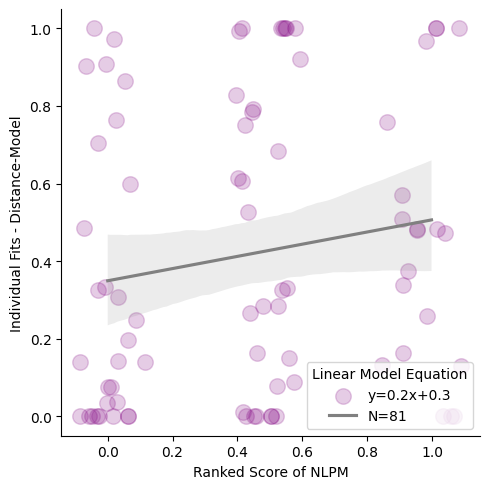

In [ ]:

import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from google.colab import files

import numpy as np, pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy import stats
#extract correlation coefficient (rounded to 4 decimal places)
exp2_r_fullest = round(pearsonr(both_fullest_datasets['weightDist'], both_fullest_datasets['Score'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(exp2_r_fullest)

#extract p-value (rounded to 4 decimal places)
exp2_p_fullest = round(pearsonr(both_fullest_datasets['weightDist'], both_fullest_datasets['Score'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(exp2_p_fullest)


N = len(both_fullest_datasets.index[0:])
colors = np.random.rand(N)

slope, intercept, r_value, p_value, std_err = stats.linregress(both_fullest_datasets['Score'],both_fullest_datasets['weightDist'])

ax = sns.lmplot(data = both_fullest_datasets, x = 'Score', y = 'weightDist',
                markers=["."], palette="Set1",
                x_jitter = .1, scatter_kws = {'color': 'purple', 'alpha': 0.2, 's':500},
                line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color': 'grey'})
plt.xlabel('Ranked Score of NLPM')
plt.ylabel('Individual Fits - Distance-Model')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept), "N=81"])
plt.savefig('Dist_Full.png',dpi=300)
files.download("Dist_Full.png")
plt.show(ax)


In [ ]:

N = len(both_fullest_datasets.index[0:])
colors = np.random.rand(N)
N

81

In [ ]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model_full_dist = LinearRegression()
weights_all = np.array(both_fullest_datasets['weightDist'])
weights_all  = np.reshape(weights_all,(-1,1))
scores_all = np.array(both_fullest_datasets['Score'])
scores_all  = np.reshape(scores_all,(-1,1))

#define predictor and response variables
X, y = weights_all, scores_all

#fit regression model
model_full_dist.fit(X, y)

#display regression coefficients and R-squared value of model
print(model_full_dist.intercept_, model_full_dist.coef_, model_full_dist.score(X, y))


[0.36903008] [[0.15986362]] 0.025145900625571316


In [ ]:
from scipy import stats
model_full_dist = LinearRegression()
model_full_dist.fit(X, y)
params = np.append(model_full_dist.intercept_,model_full_dist.coef_)
predictions = model_full_dist.predict(X)
new_X = np.append(np.ones((len(X),1)), X, axis=1)
M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.   , 0.157])

0.0947
0.5662


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

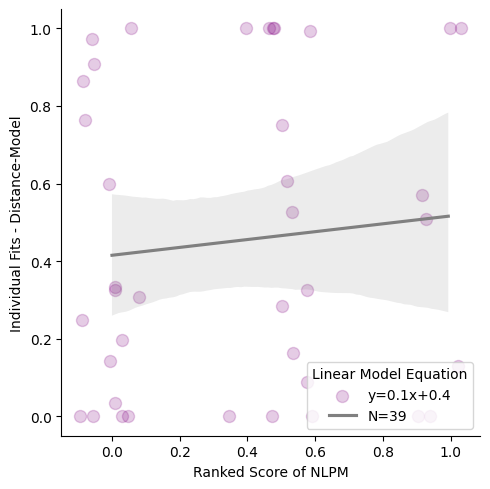

In [ ]:

#extract correlation coefficient (rounded to 4 decimal places)
r_full = round(pearsonr(df_all_exp['Score'], df_all_exp['weightDist'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(r_full)

#extract p-value (rounded to 4 decimal places)
p_full = round(pearsonr(df_all_exp['Score'], df_all_exp['weightDist'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(p_full)


N = len(df_all_exp.index[0:])
colors = np.random.rand(N)


slope, intercept, r_value, p_value, std_err = stats.linregress(df_all_exp['Score'],df_all_exp['weightDist'])

ax = sns.lmplot(data = df_all_exp, x = 'Score', y = 'weightDist',
            markers=["."], palette="Set1",
            x_jitter = .1, scatter_kws = {'color': 'purple', 'alpha': 0.2, 's':300},
            line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color': 'grey'})
plt.xlabel('Ranked Score of NLPM')
plt.ylabel('Individual Fits - Distance-Model')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept), "N=39"])
plt.savefig('Dist_Sub1.png',dpi=300)
files.download("Dist_Sub1.png")
plt.show(ax)


In [ ]:
N = len(df_all_exp.index[0:])
colors = np.random.rand(N)
N

39

In [ ]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model_sub1_dist = LinearRegression()
weights_all = np.array(df_all_exp['weightDist'])
weights_all  = np.reshape(weights_all,(-1,1))
scores_all = np.array(df_all_exp['Score'])
scores_all  = np.reshape(scores_all,(-1,1))

#define predictor and response variables
X, y = weights_all, scores_all

#fit regression model
model_sub1_dist.fit(X, y)

#display regression coefficients and R-squared value of model
print(model_sub1_dist.intercept_, model_sub1_dist.coef_, model_sub1_dist.score(X, y))

[0.32712596] [[0.0884963]] 0.008974890005396974


In [ ]:
df_all_sub = df_all_exp[df_all_exp['Score'] - df_all_exp['behaviour_dist'] < .25]

In [ ]:
# exracting only those who were super describers from Q1 AND Q2
len(df_all_sub['Lable'])

21

<ipython-input-119-7cff77b9a02d>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


0.5878
0.0051


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

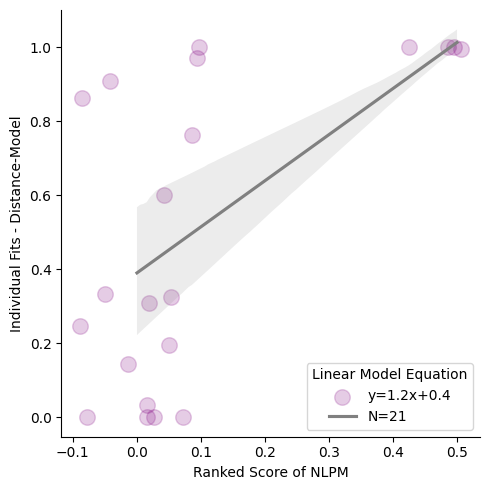

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#extract correlation coefficient (rounded to 4 decimal places)
r_full = round(pearsonr(df_all_sub['Score'], df_all_sub['weightDist'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(r_full)

#extract p-value (rounded to 4 decimal places)
p_full = round(pearsonr(df_all_sub['Score'], df_all_sub['weightDist'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(p_full)


N = len(df_all_sub.index[0:])
colors = np.random.rand(N)

import numpy as np, pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_all_sub['Score'],df_all_sub['weightDist'])

ax = sns.lmplot(data = df_all_sub, x = 'Score', y = 'weightDist',
                markers=["."], palette="Set1",
                x_jitter = .1, scatter_kws = {'color': 'purple', 'alpha': 0.2, 's':500},
                line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color': 'grey'})
plt.xlabel('Ranked Score of NLPM')
plt.ylabel('Individual Fits - Distance-Model')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept), "N=21"])
plt.savefig('Dist_Sub2.png',dpi=300)
files.download("Dist_Sub2.png")
plt.show(ax)




In [ ]:
N = len(df_all_sub.index[0:])
colors = np.random.rand(N)
N

21

In [ ]:

#initiate linear regression model
model_sub2_dist = LinearRegression()
weights_all = np.array(df_all_sub['weightDist'])
weights_all  = np.reshape(weights_all,(-1,1))
scores_all = np.array(df_all_sub['Score'])
scores_all  = np.reshape(scores_all,(-1,1))

#define predictor and response variables
X, y = weights_all, scores_all

#fit regression model
model_sub2_dist.fit(X, y)

#display regression coefficients and R-squared value of model
print(model_sub2_dist.intercept_, model_sub2_dist.coef_, model_sub2_dist.score(X, y))

[-0.04538877] [[0.27674893]] 0.34552381828750656


In [ ]:
len(Exp2_scores_and_lables['weightDist'])

19

In [ ]:
len(both_fullest_datasets['Score'])

81

In [ ]:
Exp3_scores_and_lables['ResistBayes']

0      3.515770
1      5.864009
2     10.000000
3      3.393935
5      6.180340
6      0.902922
7      1.397492
8      4.061578
10     6.975741
11    10.000000
13     9.160988
14     1.729459
15     6.180262
18     9.430050
23     9.160988
25     9.217106
27     5.874953
29     6.180340
35    10.000000
38     2.145873
Name: ResistBayes, dtype: float64

---
Bayesian Model - & - Text
---



-0.2296
0.0392


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

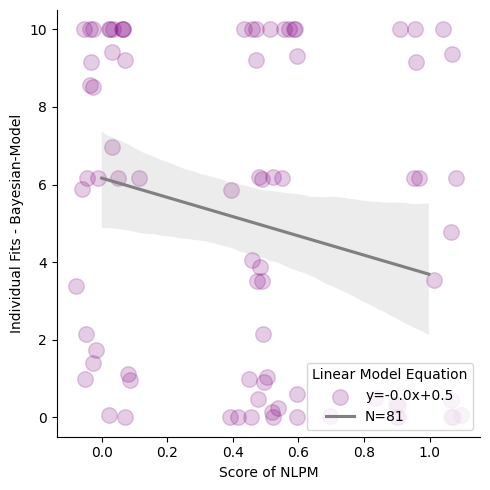

In [ ]:
#extract correlation coefficient (rounded to 4 decimal places)
bayes_r_fullest = round(pearsonr(both_fullest_datasets['ResistBayes'], both_fullest_datasets['Score'])[0], 4)
print(bayes_r_fullest)

#extract p-value (rounded to 4 decimal places)
bayes_p_fullest = round(pearsonr(both_fullest_datasets['ResistBayes'], both_fullest_datasets['Score'])[1], 4)
print(bayes_p_fullest)


N = len(both_fullest_datasets.index[0:])
colors = np.random.rand(N)

slope, intercept, r_value, p_value, std_err = stats.linregress(both_fullest_datasets['ResistBayes'],both_fullest_datasets['Score'])

ax = sns.lmplot(data = both_fullest_datasets, x = 'Score', y = 'ResistBayes',
                markers=["."], palette="Set1",
                x_jitter = .1, scatter_kws = {'color': 'purple', 'alpha': 0.2, 's':500},
                line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept), 'color': 'grey'})
plt.xlabel('Score of NLPM')
plt.ylabel('Individual Fits - Bayesian-Model')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept),"N=81"])
plt.savefig('Bayes_Full.png',dpi=300)
files.download("Bayes_Full.png")
plt.show(ax)


In [ ]:
N = len(both_fullest_datasets.index[0:])
colors = np.random.rand(N)
N


81

In [ ]:
#initiate linear regression model
model_full_bayes = LinearRegression()
resist_all_bayes = np.array(both_fullest_datasets['ResistBayes'])
resist_all_bayes  = np.reshape(resist_all_bayes,(-1,1))
scores_all_bayes = np.array(both_fullest_datasets['Score'])
scores_all_bayes  = np.reshape(scores_all_bayes,(-1,1))

#define predictor and response variables
X, y = resist_all_bayes, scores_all_bayes

#fit regression model
model_full_bayes.fit(X, y)

#display regression coefficients and R-squared value of model
print(model_full_bayes.intercept_, model_full_bayes.coef_, model_full_bayes.score(X, y))

[0.54386014] [[-0.02123952]] 0.052734890420276015


In [ ]:
df_all_exp['ResistBayes']

0      3.515770
1      5.864009
2     10.000000
3      3.393935
5      6.180340
6      0.902922
7      1.397492
8      4.061578
10     6.975741
11    10.000000
13     9.160988
14     1.729459
15     6.180262
18     9.430050
23     9.160988
25     9.217106
27     5.874953
29     6.180340
35    10.000000
38     2.145873
1     10.000000
5      2.143704
9     10.000000
10    10.000000
11     0.000000
13    10.000000
14    10.000000
18     0.000000
21     0.000000
22     3.536135
23     0.000000
25     0.000000
26    10.000000
27    10.000000
29     0.147029
35     0.000000
36     0.009955
38     0.340827
39     0.000000
Name: ResistBayes, dtype: float64

<ipython-input-128-81c72786bd92>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


-0.2137
0.1915


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

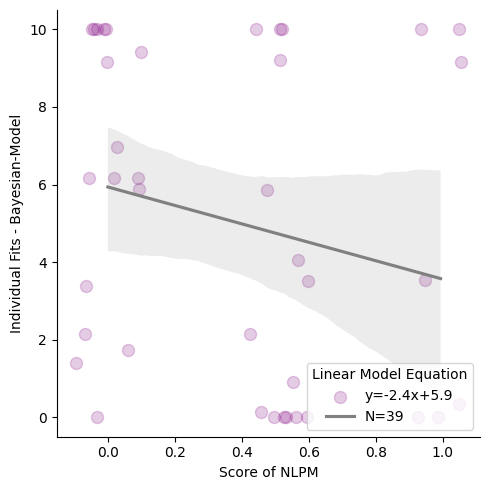

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from google.colab import files
#extract correlation coefficient (rounded to 4 decimal places)
r_full = round(pearsonr(df_all_exp['Score'], df_all_exp['ResistBayes'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(r_full)

#extract p-value (rounded to 4 decimal places)
p_full = round(pearsonr(df_all_exp['Score'], df_all_exp['ResistBayes'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(p_full)


N = len(df_all_exp.index[0:])
colors = np.random.rand(N)

import numpy as np, pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_all_exp['Score'],df_all_exp['ResistBayes'])

ax = sns.lmplot(data = df_all_exp, x = 'Score', y = 'ResistBayes',
            markers=["."], palette="Set1",
            x_jitter = .1, scatter_kws = {'color': 'purple', 'alpha': 0.2, 's':300},
            line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color': 'grey'})
plt.xlabel('Score of NLPM')
plt.ylabel('Individual Fits - Bayesian-Model')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept), "N=39"])
plt.savefig('Bayes_Sub1.png',dpi=300)
files.download("Bayes_Sub1.png")
plt.show(ax)

In [ ]:
N = len(df_all_exp.index[0:])
colors = np.random.rand(N)
N

39

In [ ]:
#initiate linear regression model
model_sub1_bayes = LinearRegression()
resist_sub1_bayes = np.array(df_all_exp['ResistBayes'])
resist_sub1_bayes  = np.reshape(resist_sub1_bayes,(-1,1))
scores_sub1_bayes = np.array(df_all_exp['Score'])
scores_sub1_bayes  = np.reshape(scores_sub1_bayes,(-1,1))

#define predictor and response variables
X, y = resist_sub1_bayes, scores_sub1_bayes

#fit regression model
model_sub1_bayes.fit(X, y)

#display regression coefficients and R-squared value of model
print(model_sub1_bayes.intercept_, model_sub1_bayes.coef_, model_sub1_bayes.score(X, y))

[0.4643751] [[-0.01919239]] 0.04564921080560147


<ipython-input-131-de5cb4b568c6>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


-0.6331
0.0021


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

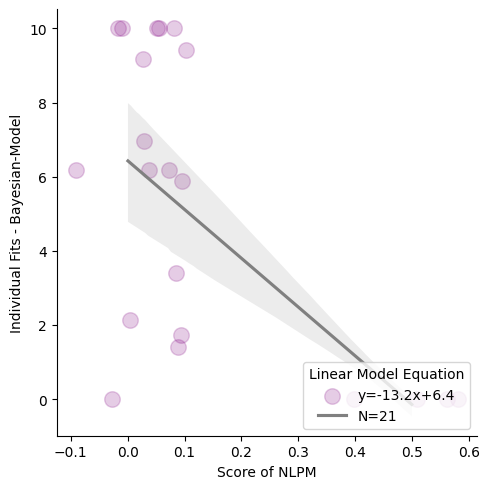

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np, pandas as pd;
import seaborn as sns;
from scipy import stats

#extract correlation coefficient (rounded to 4 decimal places)
bayes_r_sub = round(pearsonr(df_all_sub['Score'], df_all_sub['ResistBayes'])[0], 4)
print(bayes_r_sub)

#extract p-value (rounded to 4 decimal places)
bayes_p_sub = round(pearsonr(df_all_sub['Score'], df_all_sub['ResistBayes'])[1], 4)
print(bayes_p_sub)

N = len(df_all_sub.index[0:])
colors = np.random.rand(N)

slope, intercept, r_value, p_value, std_err = stats.linregress(df_all_sub['Score'],df_all_sub['ResistBayes'])

ax = sns.lmplot(data = df_all_sub, x = 'Score', y = 'ResistBayes',
                markers=["."], palette="Set1",
                x_jitter = .1, scatter_kws = {'color': 'purple', 'alpha': 0.2, 's':500},
                line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color': 'grey'})
plt.xlabel('Score of NLPM')
plt.ylabel('Individual Fits - Bayesian-Model')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept), "N=21"])
plt.savefig('Bayes_Sub2.png',dpi=300)
files.download("Bayes_Sub2.png")
plt.show(ax)




In [ ]:

N = len(df_all_sub.index[0:])
colors = np.random.rand(N)

N

21

In [ ]:
#initiate linear regression model
model_sub2_bayes = LinearRegression()
resist_sub2_bayes = np.array(df_all_sub['ResistBayes'])
resist_sub2_bayes  = np.reshape(resist_sub2_bayes,(-1,1))
scores_sub2_bayes = np.array(df_all_sub['Score'])
scores_sub2_bayes  = np.reshape(scores_sub2_bayes,(-1,1))

#define predictor and response variables
X, y = resist_sub2_bayes, scores_sub2_bayes

#fit regression model
model_sub2_bayes.fit(X, y)

#display regression coefficients and R-squared value of model
print(model_sub2_bayes.intercept_, model_sub2_bayes.coef_, model_sub2_bayes.score(X, y))

[0.25301842] [[-0.03044912]] 0.40080203475290754
